Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [54]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [55]:
#### Load the automobile dataset 
automobile_df = pd.read_csv('automobile.txt')


Gain insight into data

In [56]:
automobile_df.head() # to view the first 5 rows

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [57]:
automobile_df.info() # to get the data types of each column and the number of non-null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [58]:
automobile_df.describe() # to get summary statistics for each numerical column

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Replace the question mark ? with a none value

In [59]:
automobile_df.replace("?", np.nan, inplace = True)
automobile_df.head(5) 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Gain insight into missing data in each column 

In [60]:
# get the number of missing data points per column
missing_values_count = automobile_df.isnull().sum()
missing_values_count

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Convert relevent columns into the correct data type

In [61]:
# Change/convert the column (price) to float
automobile_df['price'] = automobile_df['price'].astype(float)

In [62]:
#Calculate the average of the column

avg_norm_loss = automobile_df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)    

avg_bore = automobile_df["bore"].astype("float").mean(axis=0)
print("Average of bore:", avg_bore)

avg_stroke = automobile_df["stroke"].astype('float').mean(axis=0)
print("Average of Stroke", avg_stroke)

avg_horsepower = automobile_df["horsepower"].astype("float").mean(axis=0)
print("Average horsepower:", avg_horsepower)

avg_peakrpm = automobile_df["peak-rpm"].astype("float").mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

avg_price = automobile_df["price"].astype("float").mean(axis=0)
print("Average price:", avg_price)

Average of normalized-losses: 122.0
Average of bore: 3.3297512437810943
Average of Stroke 3.255422885572139
Average horsepower: 104.25615763546799
Average peak rpm: 5125.369458128079
Average price: 13207.129353233831


In [63]:
#Replace "NaN" by mean value in the following columns: normalised losses, bore, stroke, horsepower and peak rpm

automobile_df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

automobile_df["bore"].replace(np.nan, avg_bore, inplace=True)

automobile_df["stroke"].replace(np.nan, avg_stroke, inplace=True)

automobile_df["horsepower"].replace(np.nan, avg_horsepower, inplace=True)

automobile_df["peak-rpm"].replace(np.nan, avg_peakrpm, inplace=True)

automobile_df["price"].replace(np.nan, avg_price, inplace=True)

/var/folders/cy/hjxs58js5zz981wfdclqqcm80000gn/T/ipykernel_971/3517130139.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  automobile_df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
/var/folders/cy/hjxs58js5zz981wfdclqqcm80000gn/T/ipykernel_971/3517130139.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which

In [64]:
automobile_df.head(5) 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [65]:
missing_values_count = automobile_df.isnull().sum()
missing_values_count

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Visualisations 

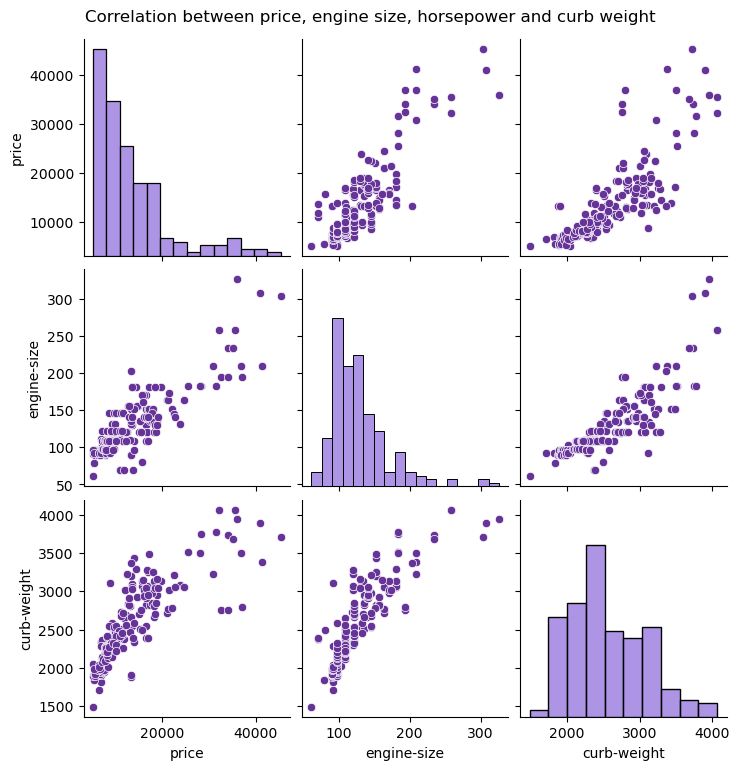

In [66]:
# Numeric features
sns.pairplot(automobile_df[['price', 'engine-size', 'horsepower', 'curb-weight']], diag_kws={'color':'mediumpurple'}, plot_kws={'color':'rebeccapurple'})
plt.suptitle('Correlation between price, engine size, horsepower and curb weight',  y=1.02)
plt.show()

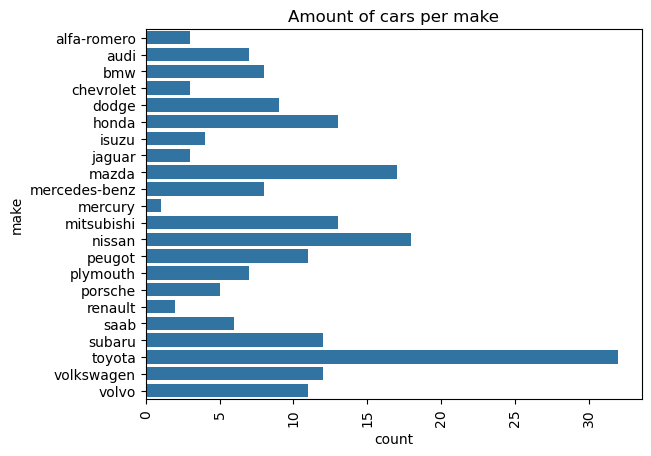

In [67]:
# Categorical features
sns.countplot(automobile_df['make'])
plt.xticks(rotation=90)
plt.title('Amount of cars per make')
plt.show()

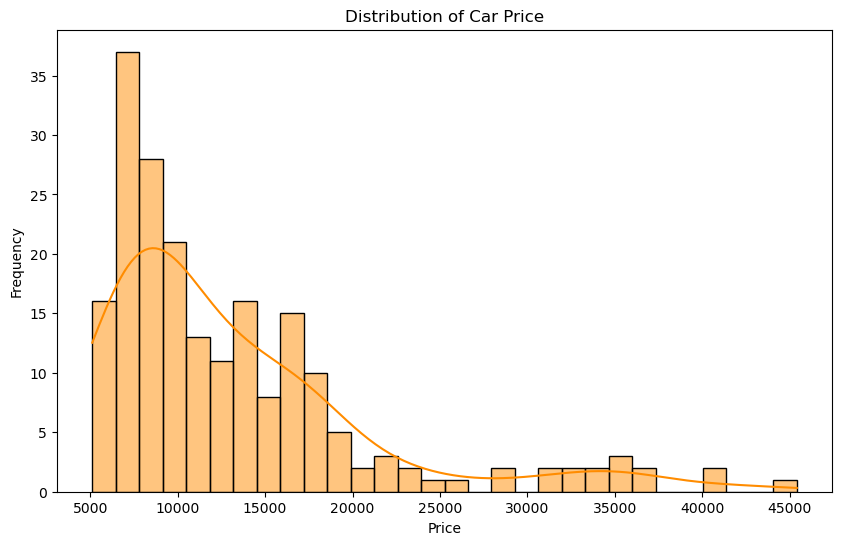

In [68]:
# Plot distributions
plt.figure(figsize=(10, 6))
sns.histplot(automobile_df['price'], bins=30, color = 'darkorange', kde=True)
plt.title('Distribution of Car Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Plot graph to show preferred number of doors

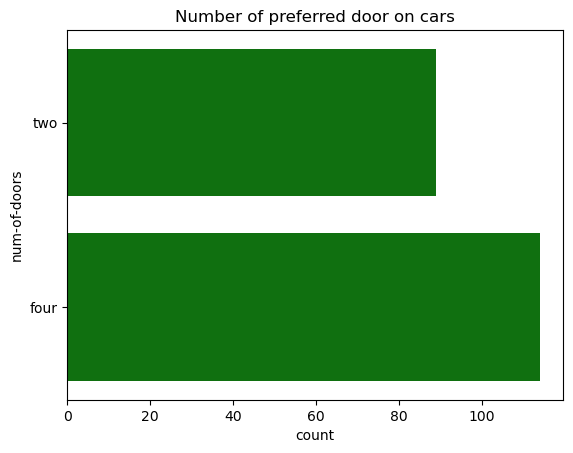

In [69]:
sns.countplot(automobile_df['num-of-doors'], color = 'green')
plt.title('Number of preferred door on cars')
plt.show()

In [70]:
#Number of body style per car make
automobile_body_type = automobile_df.groupby('body-style')['make'].count()
automobile_body_type

body-style
convertible     6
hardtop         8
hatchback      70
sedan          96
wagon          25
Name: make, dtype: int64

Visual aid to display car body type

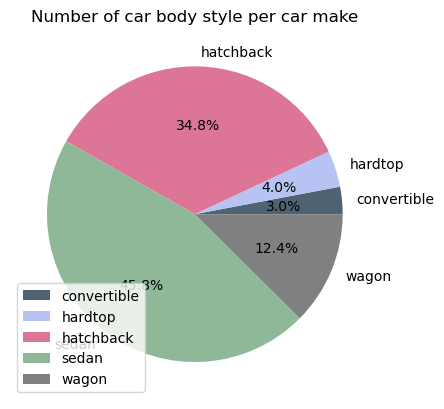

In [71]:
#define the labels 
category = ['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon']

#portion covered by each label 
slices = [6, 8, 70, 92, 25]

# chose the colours
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', 'grey']

plt.pie(slices, labels=category, radius = 1.0, colors = colors, autopct='%1.1f%%')
plt.title('Number of car body style per car make')

plt.legend()
plt.show()

Average price for each car

In [72]:
avg_car_price = automobile_df.groupby('make')['price'].mean()
avg_car_price

make
alfa-romero      15498.333333
audi             17194.589908
bmw              26118.750000
chevrolet         6007.000000
dodge             7875.444444
honda             8184.692308
isuzu            11061.814677
jaguar           34600.000000
mazda            10652.882353
mercedes-benz    33647.000000
mercury          16503.000000
mitsubishi        9239.769231
nissan           10415.666667
peugot           15489.090909
plymouth          7963.428571
porsche          27761.825871
renault           9595.000000
saab             15223.333333
subaru            8541.250000
toyota            9885.812500
volkswagen       10077.500000
volvo            18063.181818
Name: price, dtype: float64

Top 5 cars with the highests average car price

How many cars use gas or diesel

In [76]:
automobile_fuel_type = automobile_df.groupby('fuel-type')['price'].count()
automobile_fuel_type

fuel-type
diesel     20
gas       185
Name: price, dtype: int64

Text(0.5, 0, 'Fuel type')

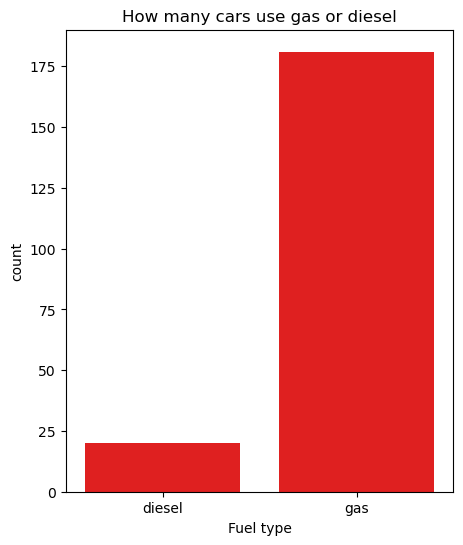

In [77]:
#Plot graph to display gas and diesel information
#Data information for x and y
a2=['diesel', 'gas']
b2= [20,181]

#plot the vertical graph
plt.figure(figsize=(5,6))
sns.barplot(x=a2, y=b2, color = 'red')
plt.title('How many cars use gas or diesel')
plt.ylabel('count')
plt.xlabel('Fuel type')